# Hackathon Notebook

#### Author: I Hull

#### Date: April 2024

#### Streaming Service Hackathon

Netflix is one of the world's largest streaming platforms, with millions of users streaming movies and TV
shows every day. As a result, Netflix has accumulated a massive amount of data that can be used to gain
insights into user behaviour, preferences, and more. In this project, students will explore a dataset
containing information about movies and TV shows available on Netflix.

#### Brief

The CEO of CS-Streaming has brought you and your team in to analyse Netflix data for their new
streaming service. They are confident that your analysis will be helpful to you in making decisions about
their service. They need your expertise to uncover trends and insights from the Netflix data that will be
beneficial to their new product. They are eager to begin this project and will therefore need a timely
response.

You are to report on how CS-Streaming can best optimise its services and compete with Netflix.

# 1.0 Import data and libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")


In [194]:
# Read in data
file = r'/Users/Alexandre/Documents/ML/Cambridge Spark docs/netflix_titles.csv'

data = pd.read_csv(file)

In [195]:
# create a copy to work on
df = data.copy() 

#### Brazilian stuff

In [196]:
# data = df.copy()
# rate_fix(data)
# data.duration = data.duration.apply(dur_fix)

# movies=data[data.type=='Movie']
# tv=data[data.type=='TV']

# br_tv=tv[tv.country=='Brazil']
# br_movies=movies[movies.country=='Brazil']


# br_movies

In [197]:
# Check shape and head
print(df.shape)
movie_df[movie_df['rating']=='66 min']
len(df[df['country']=='Brazil'])

(8807, 12)


77

In [198]:
# Check columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [199]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [200]:
# Split dataframe by type: TV or film and check data
movie_df = df[df.type=='Movie']
tv_df = df[df.type=='TV Show']

# movie_df.info()
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2676 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2676 non-null   object
 1   type          2676 non-null   object
 2   title         2676 non-null   object
 3   director      230 non-null    object
 4   cast          2326 non-null   object
 5   country       2285 non-null   object
 6   date_added    2666 non-null   object
 7   release_year  2676 non-null   int64 
 8   rating        2674 non-null   object
 9   duration      2676 non-null   object
 10  listed_in     2676 non-null   object
 11  description   2676 non-null   object
dtypes: int64(1), object(11)
memory usage: 271.8+ KB


In [201]:
# Check the stats for the one column that is type int
movie_df.describe()

,release_year
count,6131.000000
mean,2013.121514
std,9.678169
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [202]:
# One movie from 1925
df[df['release_year']==1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


### Functions for cleaning certain columns

In [203]:
movie_df = df[df.type=='Movie']


def rate_fix(df):
    for i in df.index:
        x = df.at[i, 'rating']
        if isinstance(x, str) and x.split()[-1] in ['min','Season']:
            parts = x.split()
            if parts[-1] == 'min':
                df.at[i, 'duration'] = x
                df.at[i, 'rating'] = 'Unknown'
        elif type(x)==np.nan:
            df.at[i, 'rating'] = 'Unknown'
        else:
            pass


def dur_fix(string):
  if type(string)==str and string.split(' ')[-1] in ['min','Season']:
    return int(string.split(' ')[0])
  else:
    return 'Unknown'


rate_fix(movie_df)
movie_df.duration = movie_df.duration.apply(dur_fix)
movie_df.loc[[5541]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Unknown,74,Movies,"Louis C.K. muses on religion, eternal love, gi..."


# 2.0 Data cleaning and preparation

### 2.1 Overview

In [204]:
# Missing values - actual numbers
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [205]:
# Missing values as percentage
df.isnull().sum()* 100 / len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [206]:
# Check for duplicates
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


* We have no duplicates but quite a few missing values. 
* The director column may not be much use to us as there is almost a third of these missing. 
* We can leave them in for now and put 'Unknown' for the missing values but it would be unwise to put much weight on this in the analysis.
* The cast and country both have 9% missing from the total of 8807 rows so we will also put 'Unknown' for the missing values
* There are a few missing values for the date added (10), rating (4) and duration (3)
* We will set the date added to 'unknown', the rating to 'unrated' and the duration to the mode duration to avoid dropping rows and to preserve as much information in the data as possible

### 2.2 Director, cast, country

In [207]:
# Replace missing values with 'Unknown'
df.loc[df['director'].isna(),'director']= 'Unknown'
df.loc[df['cast'].isna(),'cast'] = 'Unknown'
df.loc[df['country'].isna(), 'country'] = 'Unknown'

### 2.3 Date added

In [208]:
# We have 10 values missing for the date
df[df['date_added'].isnull()].shape[0]

10

In [209]:
# We will set this to a datetime object and then add 'Unknown' for those missing values for now
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract month and year and also the day of the week that might be useful
df['year']= df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['dayofweek'] = df['date_added'].dt.dayofweek # added day of the week 

# Replace missing values with 'Unknown' - might be worth just dropping these rows ultimately?
df.loc[df['date_added'].isnull(),'date_added'] = 'Unknown'
df.loc[df['year'].isnull(),'year'] = 'Unknown'
df.loc[df['month'].isnull(),'month'] = 'Unknown'
df.loc[df['dayofweek'].isnull(),'dayofweek'] = 'Unknown'

In [210]:
# convert the year, month, day values that are not equal to 'unknown' to show as a year string rather than a float
df.loc[df['year']!= 'Unknown','year'] = df[df['year']!= 'Unknown']['year'].astype('int').astype('str')
df.loc[df['month']!= 'Unknown','month'] = df[df['month']!= 'Unknown']['month'].astype('int').astype('str')
df.loc[df['dayofweek']!= 'Unknown','dayofweek'] = df[df['dayofweek']!= 'Unknown']['dayofweek'].astype('int').astype('str')

# Check the year is showing as we want it to
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,dayofweek
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,5
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,4


### 2.4 Release Year

In [211]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

We have some very early films in here

### 2.5 Ratings

In [212]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

* We seem to have some ratings incorrectly put to number of minutes. We can look at these
* We can find out what these ratings mean also

In [213]:
df[df['rating']=='74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,dayofweek
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04 00:00:00,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,1


In [214]:
df[df['rating']=='84 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,dayofweek
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16 00:00:00,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,4


In [215]:
df[df['rating']=='66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,dayofweek
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15 00:00:00,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,8,0


In [216]:
# Set these to 'unrated'
wrong = ['74 min','84 min','66 min']
df.loc[df['rating'].isin(wrong), 'rating'] = 'Unrated'

In [217]:
# Check null values
display(df.loc[df['rating'].isna()])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,dayofweek
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,2017-01-26 00:00:00,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017,1,3
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01 00:00:00,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016,12,3
7312,s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01 00:00:00,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018,2,3
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01 00:00:00,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017,3,2


In [218]:
# Set the missing values to 'unrated'
df.loc[df['rating'].isna(), 'rating'] = 'Unrated'

### 2.6 Duration

In [219]:
# Check the nulls
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,dayofweek
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04 00:00:00,2017,Unrated,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,1
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16 00:00:00,2010,Unrated,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,4
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15 00:00:00,2015,Unrated,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,8,0


In [220]:
# Check the value counts for movies to find the most common value
df[df['type']=='Movie']['duration'].value_counts().head(5)

90 min    152
94 min    146
93 min    146
97 min    146
91 min    144
Name: duration, dtype: int64

In [221]:
# Set the missing values for the movies to the most common 90 minutes
df.loc[df['duration'].isna(), 'duration'] = '90'

* It would be more useful to set the duration for movies in minutes to an integer, so when we do analysis it would be a good idea to split out movies and tv shows into separate dataframes

In [222]:
# Separate dataframes into two
movies = df[df['type']=='Movie']
tv = df[df['type']=='TV Show']

In [223]:
# Strip off the 'min'
movies['duration'] = movies['duration'].str.replace("min","")

In [224]:
# Set to numeric so we can use this column properly
movies['duration'] = pd.to_numeric(movies['duration'])

In [225]:
# Check we have made the change
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6131 non-null   object
 1   type          6131 non-null   object
 2   title         6131 non-null   object
 3   director      6131 non-null   object
 4   cast          6131 non-null   object
 5   country       6131 non-null   object
 6   date_added    6131 non-null   object
 7   release_year  6131 non-null   int64 
 8   rating        6131 non-null   object
 9   duration      6131 non-null   int64 
 10  listed_in     6131 non-null   object
 11  description   6131 non-null   object
 12  year          6131 non-null   object
 13  month         6131 non-null   object
 14  dayofweek     6131 non-null   object
dtypes: int64(2), object(13)
memory usage: 766.4+ KB


# 3.0 Movies and TV Shows Basic Stats

### 3.1 Number of movies and tv shows

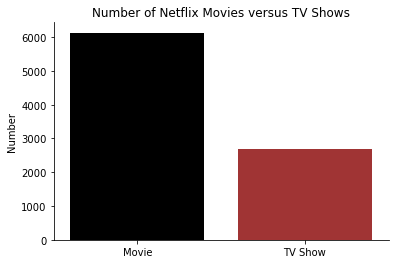

In [226]:
# How many movies and how many tv shows?
fig, ax = plt.subplots()
colors = ['black','firebrick']
ax = sns.countplot(data = df, x = 'type', palette = colors)
plt.title('Number of Netflix Movies versus TV Shows')
plt.xlabel(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Number');

In [227]:
# Get the shapes
print('Movies:',movies.shape[0])
print('TV: ',tv.shape[0])

print('Movies: ',round(movies.shape[0]/df.shape[0]*100,0),'%')
print('TV:',round(tv.shape[0]/df.shape[0]*100,0),'%')

Movies: 6131
TV:  2676
Movies:  70.0 %
TV: 30.0 %


Movies account for 70% of the content on Netflix

### 3.2 Number of movies and tv shows added by year

In [242]:
# Movies added by year
display(pd.DataFrame(movies['year'].value_counts()).sort_index().T)
display(pd.DataFrame(tv['year'].value_counts()).sort_index().T)



,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
year,1,2,1,13,3,6,19,56,253,839,1237,1424,1284,993


,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unknown
year,1,5,5,26,176,349,412,592,595,505,10


,release_year,date_added
38,2017,2021-09-16 00:00:00
105,2017,2021-09-05 00:00:00
118,2017,2021-09-02 00:00:00
128,2017,2021-09-01 00:00:00
162,2017,2021-09-01 00:00:00
...,...,...
8746,2017,2018-02-26 00:00:00
8753,2017,2018-05-01 00:00:00
8765,2017,2017-06-22 00:00:00
8786,2017,2017-12-31 00:00:00


''

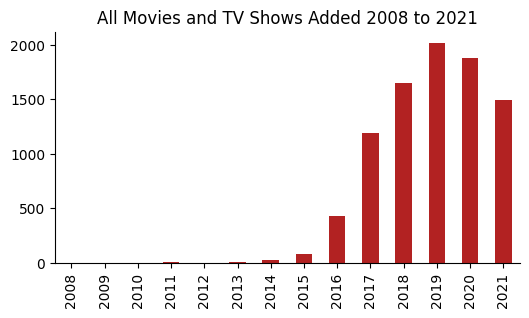

In [1041]:
# Plot the number of movies and tv shows over the whole period [Exluding Unknowns]
ax = pd.DataFrame(df['year'].value_counts()).sort_index()[:-1].plot(kind = 'bar', 
                                                                    figsize = (6,3), 
                                                                    color = 'firebrick',
                                                                    legend = False)
plt.title('All Movies and TV Shows Added 2008 to 2021')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
;

* May not be worth bothering with the years up to 2016 as there isn't much happening. 
* Home in on the later years as it seems as if there isn't much data for the years prior. This might differ for movies and tv shows

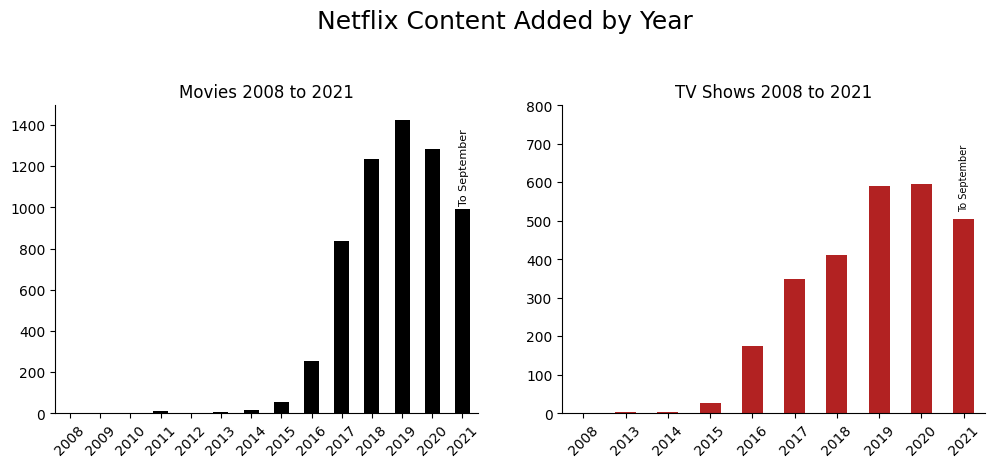

In [1042]:
# Set figure
fig, axes = plt.subplots(nrows=1,ncols=2, figsize = (12,4))
years1 = pd.DataFrame(movies['year'].value_counts()).sort_index().index
years2 = pd.DataFrame(tv['year'].value_counts()).sort_index()[:-1].index


# Plot movies 
pd.DataFrame(movies['year'].value_counts()).sort_index().plot(ax = axes[0], 
                                                                   subplots = True,
                                                                   kind = 'bar', 
                                                                   color = 'k',
                                                              )

# Plot tv (excluding unknown years)
pd.DataFrame(tv['year'].value_counts()).sort_index()[:-1].plot(ax = axes[1],
                                                               subplots = True, 
                                                               kind = 'bar', 
                                                               color = 'firebrick',
                                                              )
# Set title and legend for chart 1
axes[0].set_title('Movies 2008 to 2021')
axes[0].get_legend().remove()
axes[0].set_xticklabels(labels = years1, rotation=45)
axes[0].text(12.9, 1020, 'To September', fontsize = 8, rotation = 'vertical', color = 'black')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Set title and legend for chart 2
axes[1].set_title('TV Shows 2008 to 2021')
axes[1].get_legend().remove()
axes[1].set_ylim(0,800)
axes[1].text(8.9, 530, 'To September', fontsize = 7, rotation = 'vertical',color = 'black')
axes[1].set_xticklabels(labels = years2, rotation=45)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Set overall title and layout
plt.suptitle('Netflix Content Added by Year', size=18, y=1.12)
plt.tight_layout; 

In [1043]:
# Movies added in 2020
movies[movies['year']=='2020']['month'].value_counts()

1     152
4     127
10    116
9     115
6     115
5     105
11    103
7     103
12    101
3      93
8      82
2      72
Name: month, dtype: int64

In [1044]:
# TV shows added in 2020
tv[tv['year']=='2020']['month'].value_counts()

12    68
9     53
1     53
5     52
11    51
10    51
4     50
8     47
3     44
7     43
2     42
6     41
Name: month, dtype: int64

### 3.3 Number of releases by month

In [1045]:
# Movies added by year
display(pd.DataFrame(movies['month'].value_counts()).sort_index().T)
display(pd.DataFrame(tv['month'].value_counts()).sort_index().T)

,1,10,11,12,2,3,4,5,6,7,8,9
month,546,545,498,547,382,529,550,439,492,565,519,519


,1,10,11,12,2,3,4,5,6,7,8,9,Unknown
month,192,215,207,266,181,213,214,193,236,262,236,251,10


In [1046]:
movies_month = pd.DataFrame(df['month'].value_counts()).sort_index()[:-1].reset_index()
movies_month.columns = ['Month','Number']
movies_month.sort_values(by = 'Number',ascending = False)

,Month,Number
9,7,827
3,12,813
11,9,770
6,4,764
1,10,760
10,8,755
5,3,742
0,1,738
8,6,728
2,11,705


''

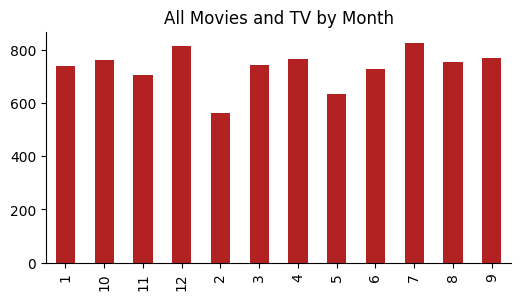

In [1047]:
# Plot the number of movies and tv shows over the whole period [Exluding Unknowns]
ax = pd.DataFrame(df['month'].value_counts()).sort_index()[:-1].plot(kind = 'bar', 
                                                                    figsize = (6,3), 
                                                                    color = 'firebrick',
                                                                    legend = False)
plt.title('All Movies and TV by Month')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
;

DOES THIS DIFFER BETWEEN MOVIES AND TV SHOWS? --- FINISH THIS

### 3.4 Movie and tv show releases by day of the week

In [1048]:
# Movies added by year
display(pd.DataFrame(movies['dayofweek'].value_counts()).sort_index().T)
display(pd.DataFrame(tv['dayofweek'].value_counts()).sort_index().T)

,0,1,2,3,4,5,6
dayofweek,628,852,906,1053,1566,557,569


,0,1,2,3,4,5,6,Unknown
dayofweek,223,345,382,343,932,259,182,10


In [1049]:
movies_dayofweek = pd.DataFrame(df['dayofweek'].value_counts()).sort_index()[:-1].reset_index()
movies_dayofweek

,index,dayofweek
0,0,851
1,1,1197
2,2,1288
3,3,1396
4,4,2498
5,5,816
6,6,751


''

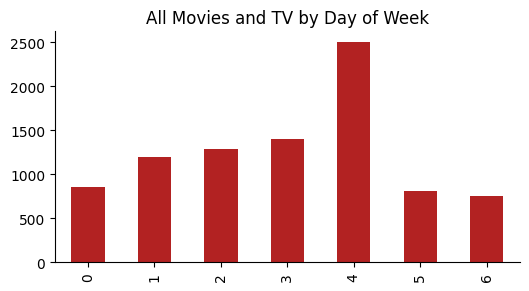

In [1050]:
# Plot the number of movies and tv shows over the whole period [Exluding Unknowns]
ax = pd.DataFrame(df['dayofweek'].value_counts()).sort_index()[:-1].plot(kind = 'bar', 
                                                                    figsize = (6,3), 
                                                                    color = 'firebrick',
                                                                    legend = False)
plt.title('All Movies and TV by Day of Week')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
;

* Monday = 0, Friday = 4

DOES THIS DIFFER BETWEEN MOVIES AND TV SHOWS? --- FINISH THIS

* The pattern shows the growth of Netflix was gradual over 14 years and not instant success
* The last year seems to drop off in terms of content reflecting that nothing was added after September so we cannot compare to 2020 properly
* The content added in 2021 to month 9 is larger than that added to month 9 in 2020 CHECK!!
* Movies were added from 2008 to 2021 with the majority from 2016
* One tv show was added in 2008 but then nothing until 2013
* The unknown values for release date all related to tv shows and we have excluded these
* More movie and tv show releases in July and December for the school holidays and the least in February and May
* Most movie and tv show releases on a Friday for the weekend and least on Sunday

# 4.0 Release Year Analysis

### 4.1 Overall analysis

In [1164]:
# Group by release year and select year and release year in a dataframe
releases = df.groupby(['release_year','type'],as_index = False)['show_id'].count()
releases.columns = ['year','type','number']
releases.sort_values(by = 'number',ascending = False).head(10)

,year,type,number
109,2017,Movie,767
111,2018,Movie,767
107,2016,Movie,658
113,2019,Movie,633
115,2020,Movie,517
116,2020,TV Show,436
105,2015,Movie,398
114,2019,TV Show,397
112,2018,TV Show,380
118,2021,TV Show,315


### CHART THIS

In [1095]:
# Get statistics for this dataframe
releases.describe()

,year,number
count,74.000000,74.000000
mean,1983.581081,119.013514
std,23.157594,266.982042
min,1925.000000,1.000000
25%,1966.250000,3.000000
50%,1984.500000,12.500000
75%,2002.750000,58.500000
max,2021.000000,1147.000000


* The earliest release is from 1925 
* Most of the content has a release date from 2000 onwards
* Top release years are 2017,2018 and 2019

### 4.2 Movies release dates

### 4.3 TV Shows release dates

# 5.0 Country Analysis

### 5.1 Basic Analysis

In [28]:
# Have a look at the country column
df['country'].head(10)

0                                        United States
1                                         South Africa
2                                              Unknown
3                                              Unknown
4                                                India
5                                              Unknown
6                                              Unknown
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

* We have multiple countries listed under this column so we need to split them out into separate columns

### 5.2 Cleaning to extract the information

In [89]:
# Split the country column on comma and expand to separate columns, then stack and reset index
countries = df.country.str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)

# Drop unknown values
countries = countries[countries != 'Unknown']
top_ten = pd.DataFrame(countries.value_counts().head(10)).reset_index()
top_ten.columns = ['Country','Number']
top_ten

,Country,Number
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


### 5.3 Where content is produced

In [791]:
# Which countries produce content movies and tv shows for netflix?
fig = go.Figure()

iplot([go.Choropleth(
             locationmode='country names',
             locations=countries,
             z=countries.value_counts()
         )])


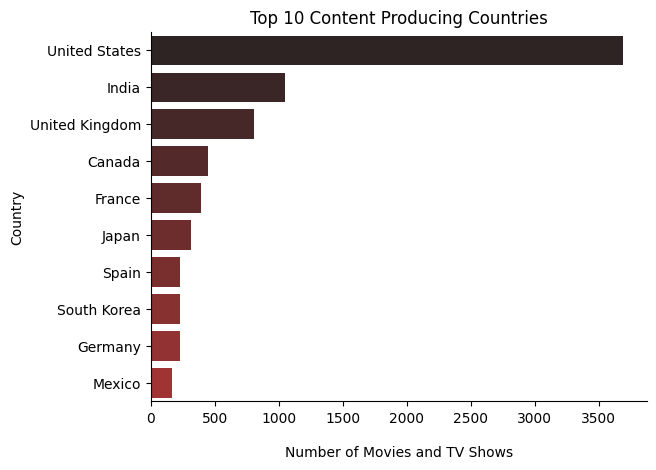

In [767]:
# Top content destinations barplot
ax = sns.barplot(y = 'Country', x = 'Number', data = top_ten, palette = 'dark:firebrick')
plt.title('Top 10 Content Producing Countries', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Country')
plt.xlabel('Number of Movies and TV Shows', labelpad = 15);

We can split this out by movies and tv shows by repeating the process above for each dataframe

''

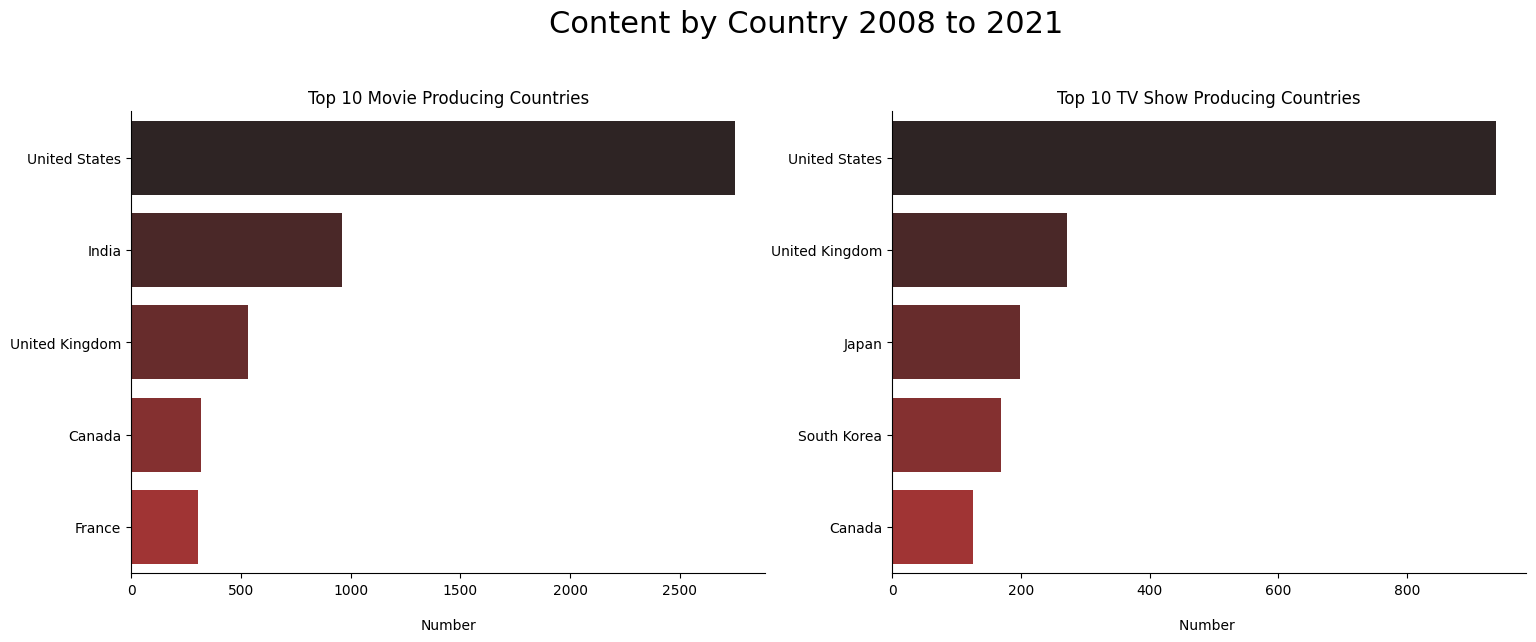

In [768]:
# Split the country column on comma and expand to separate columns, then stack and reset index
countries_movies = movies.country.str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
countries_movies = countries_movies[countries_movies != 'Unknown']
top_country_movies = pd.DataFrame(countries_movies.value_counts().head(5).reset_index())
top_country_movies.columns = ['Country','Number']

# Split the country column on comma and expand to separate columns, then stack and reset index
countries_tv = tv.country.str.split(', ', expand=True).stack().reset_index(level = 1, drop = True)
countries_tv = countries_tv[countries_tv != 'Unknown']
top_country_tv = pd.DataFrame(countries_tv.value_counts().head(5)).reset_index()
top_country_tv.columns = ['Country','Number']

# Set up figure
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))

# Plot movies
sns.barplot(ax = ax[0],y = 'Country', x = 'Number', data = top_country_movies, palette = 'dark:firebrick')
ax[0].set_title('Top 10 Movie Producing Countries', fontsize=12)
ax[0].set_xlabel('Number', labelpad = 15)
ax[0].set(ylabel=None)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Plot tv shows
sns.barplot(ax = ax[1],y = 'Country', x = 'Number', data = top_country_tv, palette = 'dark:firebrick')
ax[1].set_title('Top 10 TV Show Producing Countries', fontsize=12)
ax[1].set_xlabel('Number ', labelpad = 15)
ax[1].set(ylabel=None)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Set overall title and layout
plt.suptitle('Content by Country 2008 to 2021', size=22, y=1.05)
plt.tight_layout 
;

### 5.4 How has the USA contribution changed for movies?

In [770]:
# Does this change by year? Look at the country column and search for 'United States'

# Split into dataframes of interest based on whether the movie contains a specific country within the country column
usa_movies = pd.DataFrame(movies[movies['country'].str.contains('United States')].groupby('year')['show_id'].count())
india_movies = pd.DataFrame(movies[movies['country'].str.contains('India')].groupby('year')['show_id'].count())

# How many movies are there in total grouped by year
all_by_year = pd.DataFrame(movies.groupby('year')['show_id'].count())

# Concat the dataframes together and work out percentages
movies_all = pd.concat([usa_movies,india_movies,all_by_year],axis = 1)
movies_all.columns = ['USA','India','All']

# Replace any nans with zero
movies_all.fillna(0, inplace = True)

# Calculate percentages
movies_all['USA%'] = round(movies_all['USA']/movies_all['All']*100,0)
movies_all['India%'] = round(movies_all['India']/movies_all['All']*100,0)

# Select columns we want
movies_all_plot = movies_all[['USA%','India%']]
movies_all_plot

,USA%,India%
year,,
2008,100.0,0.0
2009,50.0,0.0
2010,100.0,0.0
2011,92.0,0.0
2012,100.0,0.0
2013,83.0,0.0
2014,95.0,0.0
2015,73.0,0.0
2016,55.0,5.0


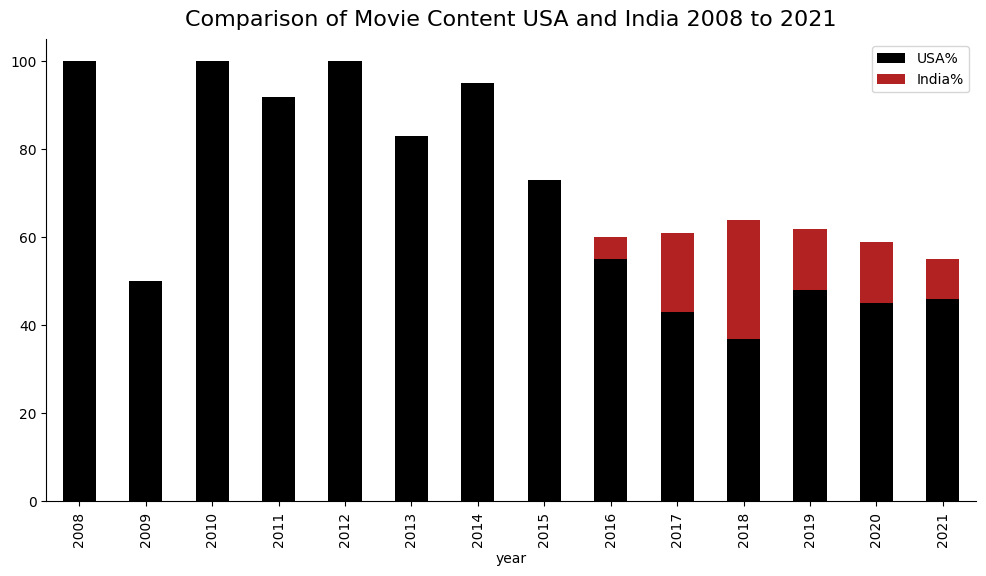

In [771]:
# Plot movie content over the years
fig, ax = plt.subplots(figsize = (12,6))
colors = ['black','firebrick']
movies_all_plot.plot(ax = ax, kind = 'bar',stacked = True, color = colors)
plt.title('Comparison of Movie Content USA and India 2008 to 2021', pad = 10, fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);


### 55 How has the USA contribution changed for tv shows?

In [750]:
# Split into dataframes of interest based on whether the movie contains a specific country within the country column
usa_tv = pd.DataFrame(tv[tv['country'].str.contains('United States')].groupby('year')['show_id'].count())
uk_tv = pd.DataFrame(tv[tv['country'].str.contains('United Kingdom')].groupby('year')['show_id'].count())
japan_tv = pd.DataFrame(tv[tv['country'].str.contains('Japan')].groupby('year')['show_id'].count())

# How many movies are there in total grouped by year
all_by_year = pd.DataFrame(tv.groupby('year')['show_id'].count())

# Concat the dataframes together and work out percentages
tv_all = pd.concat([usa_tv,uk_tv, japan_tv,all_by_year],axis = 1)
tv_all.columns = ['USA','UK','Japan','All']

# Replace any nans with zero
tv_all.fillna(0, inplace = True)

# Calculate percentages
tv_all['USA%'] = round(tv_all['USA']/tv_all['All']*100,0)
tv_all['UK%'] = round(tv_all['UK']/tv_all['All']*100,0)
tv_all['Japan%'] = round(tv_all['Japan']/tv_all['All']*100,0)

# Select columns we want
tv_all_plot = tv_all[['USA%','UK%','Japan%']]
tv_all_plot = tv_all_plot.iloc[0:-1,:]
tv_all_plot

,USA%,UK%,Japan%
year,,,
2008,100.0,0.0,0.0
2013,100.0,20.0,0.0
2014,80.0,0.0,0.0
2015,62.0,19.0,4.0
2016,36.0,12.0,14.0
2017,28.0,15.0,6.0
2018,35.0,11.0,8.0
2019,30.0,10.0,8.0
2020,41.0,8.0,8.0


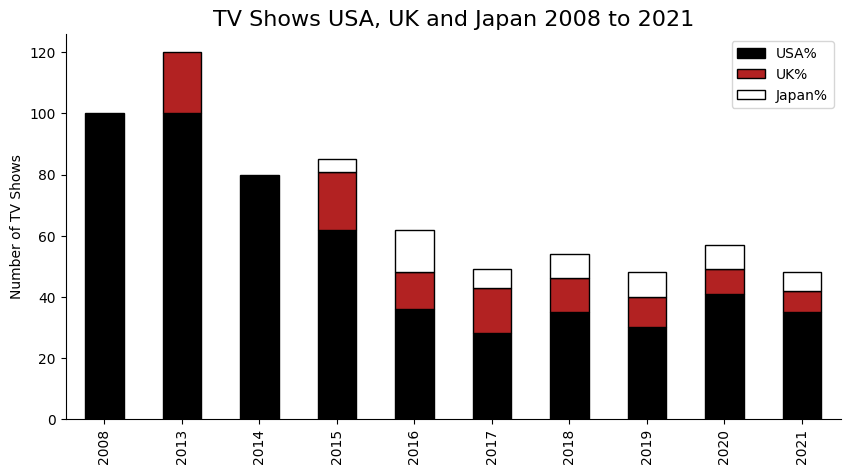

In [763]:
fig, ax = plt.subplots(figsize = (10,5))
colors = ['black','firebrick','white']
tv_all_plot.plot(ax = ax,kind = 'bar',stacked = True, color = colors, ec = 'k')
ax.set_title('TV Shows USA, UK and Japan 2008 to 2021',fontsize = 16)
ax.set_ylabel('Number of TV Shows')
ax.set_xlabel(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

* Content is produced in many parts of the world but there are some notable exceptions like Africa 
* Africa might well be an expanding market for the future as the others might be saturated
* The United States has the top place for the most content for movies and tv
* The USA has 3,689 movies and tv shows over the period
* The USA share has been declining as a % in more recent years relative to other content added to the platform
* The second highest movie content is from India followed by the UK
* TV shows are predominantly US-based, with the UK and Japan in second and third place, India doesn't feature
* South Korea is also in the top five countries for TV content

# 6.0 Genre Analysis

Possible things to investigate:

* Genres by type
* Genres by country
* Genres by year/month
* Genres by rating
* Genres by duration

Note that a movie may fall into more than one genre so we will need to split these out

### 6.1 Movie and tv genres split out

In [258]:
# Make a copy of movies and tv
genre_movies = movies.copy()
genre_tv = tv.copy()

In [259]:
# Split on comma and expand then melt to get dataframe of genres for movies
genre_movies = genre_movies['listed_in'].str.split(', ', expand=True).reset_index()
genre_movies_melt = genre_movies.melt(id_vars = 'index', var_name = 'col',value_name = 'genre')
genre_movies_top = pd.DataFrame(genre_movies_melt['genre'].value_counts().head(10)).reset_index()
genre_movies_top.columns = ['Genre','Number']
genre_movies_top

,Genre,Number
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


The top genres for movies are international movies, dramas, comedies etc

In [260]:
# Split on comma and expand then melt to get dataframe of genres for movies
genre_tv = genre_tv['listed_in'].str.split(', ', expand=True).reset_index()
genre_tv_melt = genre_tv.melt(id_vars = 'index', var_name = 'col',value_name = 'genre')
genre_tv_top = pd.DataFrame(genre_tv_melt['genre'].value_counts().head(10)).reset_index()
genre_tv_top.columns = ['Genre','Number']
genre_tv_top

,Genre,Number
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


The top genres for tv shows are international tv shows, tv dramas, tv comedies etc

''

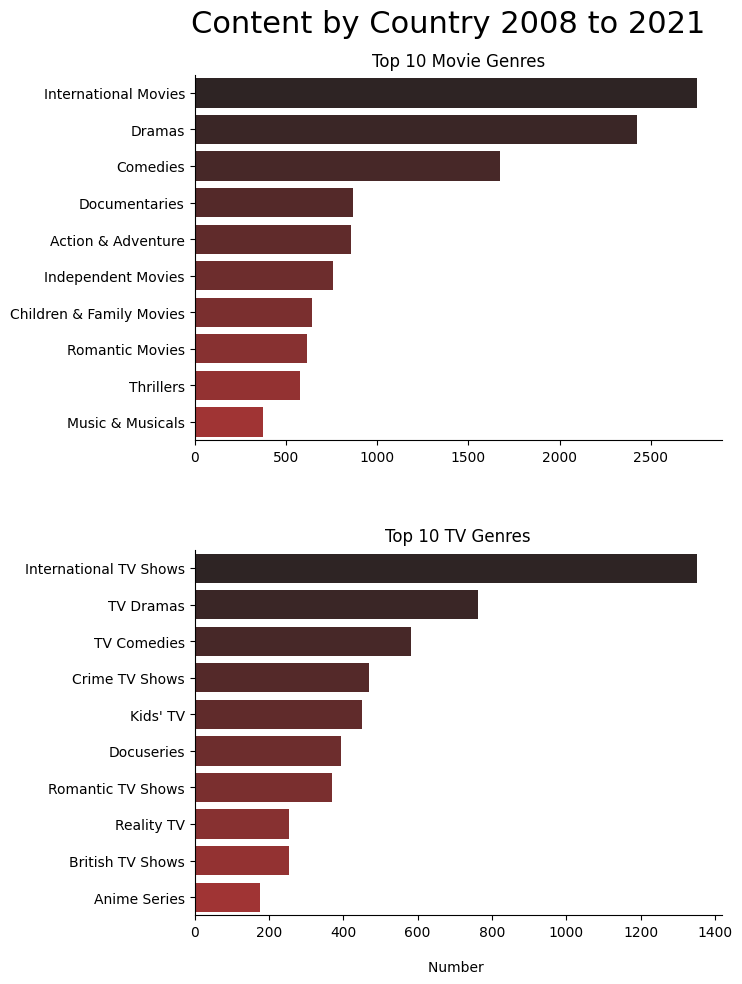

In [772]:
# Set up figure
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (6,9))
fig.tight_layout()

# Plot movies
sns.barplot(ax = ax[0],y = 'Genre', x = 'Number', data = genre_movies_top, palette = 'dark:firebrick')
ax[0].set_title('Top 10 Movie Genres', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set(ylabel=None)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Plot tv shows
sns.barplot(ax = ax[1],y = 'Genre', x = 'Number', data = genre_tv_top, palette = 'dark:firebrick')
ax[1].set_title('Top 10 TV Genres', fontsize=12)
ax[1].set_xlabel('Number ', labelpad = 15)
ax[1].set(ylabel=None)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Set overall title and layout
plt.suptitle('Content by Country 2008 to 2021', size=22, y=1.05)
plt.subplots_adjust(hspace=0.3)
;

* Most movie content falls into an international genre, the least mentioned being music and musicals
* For tv shows, international tv shows again count for the most content, with drama also popular
* We could also investigate how the genre changes by rating and duration and whether certain genres have become more or less of a proportion of the total over time

### 6.2 Genres over time - movies

In [944]:
# Make a copy
genre_time = movies.copy()

# Select columns we want
genre_time = genre_time[['year','listed_in']].set_index('year')
genre_time.head()

,listed_in
year,
2021,Documentaries
2021,Children & Family Movies
2021,"Dramas, Independent Movies, International Movies"
2021,"Comedies, Dramas"
2021,"Dramas, International Movies"


In [962]:
# Set the listed_in column to a list
genre_time['genre'] = genre_time['listed_in'].apply(lambda x: x.split(', '))

# Explode the list into separate rows
genre_exploded = genre_time['genre'].explode().reset_index()

genre_exploded

,year,genre
0,2021,Documentaries
1,2021,Children & Family Movies
2,2021,Dramas
3,2021,Independent Movies
4,2021,International Movies
...,...,...
13185,2020,Children & Family Movies
13186,2020,Comedies
13187,2019,Dramas
13188,2019,International Movies


In [964]:
# Create table to show genre against the year
pd.crosstab(genre_exploded['genre'],genre_exploded['year']).sort_values(by = '2021',ascending = False)

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
genre,,,,,,,,,,,,,,
Dramas,1,1,0,13,0,0,0,12,65,293,531,564,535,412
International Movies,0,1,0,1,0,0,2,10,82,395,668,610,575,408
Comedies,0,0,0,0,2,1,2,12,48,177,297,420,416,299
Action & Adventure,0,0,0,0,0,0,1,2,18,97,173,202,170,196
Children & Family Movies,0,0,0,1,1,2,4,11,20,78,85,147,170,122
Romantic Movies,0,0,0,0,0,0,0,1,7,63,108,150,173,114
Thrillers,1,0,0,1,0,0,0,2,14,68,111,135,133,112
Documentaries,0,0,0,0,1,1,8,13,68,206,167,188,118,99
Independent Movies,1,0,0,0,0,0,0,7,31,116,163,201,148,89


* We can see that from 2016 to 2020, international movies had more titles than dramas but this was reversed in 2021
* WE CAN CHART THIS

### 6.3 Genres over time - tv shows

In [967]:
# Make a copy
genre_time2 = tv.copy()

# Select columns we want
genre_time2 = genre_time2[['year','listed_in']].set_index('year')
genre_time2.head()

,listed_in
year,
2021,"International TV Shows, TV Dramas, TV Mysteries"
2021,"Crime TV Shows, International TV Shows, TV Act..."
2021,"Docuseries, Reality TV"
2021,"International TV Shows, Romantic TV Shows, TV ..."
2021,"TV Dramas, TV Horror, TV Mysteries"


In [968]:
# Set the listed_in column to a list
genre_time2['genre'] = genre_time2['listed_in'].apply(lambda x: x.split(', '))

# Explode the list into separate rows
genre_exploded2 = genre_time2['genre'].explode().reset_index()

genre_exploded2

,year,genre
0,2021,International TV Shows
1,2021,TV Dramas
2,2021,TV Mysteries
3,2021,Crime TV Shows
4,2021,International TV Shows
...,...,...
6128,2016,Romantic TV Shows
6129,2016,TV Dramas
6130,2019,Kids' TV
6131,2019,Korean TV Shows


In [969]:
# Create table to show genre against the year
pd.crosstab(genre_exploded2['genre'],genre_exploded2['year']).sort_values(by = '2021',ascending = False)

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unknown
genre,,,,,,,,,,,
International TV Shows,0,1,0,3,86,205,214,335,277,229,1
TV Dramas,0,4,3,8,43,130,109,164,164,137,1
TV Comedies,0,0,3,8,40,62,100,117,126,118,7
Kids' TV,0,0,2,9,40,44,65,83,108,98,2
Crime TV Shows,0,2,1,1,27,63,85,110,102,78,1
Docuseries,0,1,0,5,28,56,64,89,80,71,1
Romantic TV Shows,0,0,0,1,42,60,44,96,67,60,0
Reality TV,0,0,0,0,5,15,41,60,80,54,0
Spanish-Language TV Shows,0,0,0,0,5,21,30,37,34,46,1


* For tv shows, the international genre has remained at the top of the table over the period with almost twice as many titles as the next genre 'drama'

# 7.0 Ratings

### 7.1 Most common ratings

In [275]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Unrated', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

* All (Young Children) (TV-Y, TV-G) (G)
* 7+ (Children) (TV-Y7, TV-G) (soft PG)
* 10+ (Adolescents) (TV-Y7-FV, soft TV-PG) (hard PG)
* 13+ (Teens) (hard TV-PG, soft TV-14) (soft PG-13)
* 16+ (Older Teens) (hard TV-14, TV-MA) (hard PG-13, R)
* 18+ (Adults) (TV-MA) (NC-17, unrated)

In [285]:
# Create dataframe of the most used ratings
top_rating = df['rating'].value_counts().head(10)
top_rating = pd.DataFrame(top_rating).reset_index()
top_rating.columns = ['Rating','Number']
top_rating

,Rating,Number
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


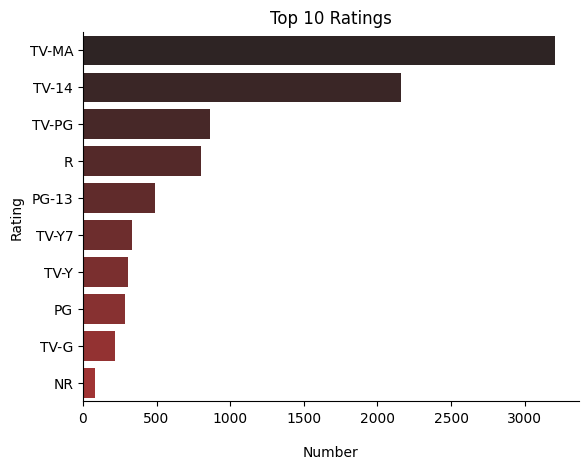

In [773]:
# Top ratings barplot
ax = sns.barplot(y = 'Rating', x = 'Number', data = top_rating, palette = 'dark:firebrick')
plt.title('Top 10 Ratings', fontsize=12)
plt.ylabel('Rating')
plt.xlabel('Number', labelpad = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

* The top rating is TV-MA which is mature audience only
* The next most common is TV-14 which is unsuitable for children under 14
* The least common is NR which is 'Not Rated'

Does this differ between movies and tv shows?

### 7.2 Ratings by movies

In [287]:
top_rating_movies = movies['rating'].value_counts().head(10)
top_rating_movies = pd.DataFrame(top_rating_movies).reset_index()
top_rating_movies.columns = ['Rating','Number']
top_rating_movies

,Rating,Number
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


### 7.3 Ratings by tv shows

In [288]:
top_rating_tv = tv['rating'].value_counts().head(10)
top_rating_tv = pd.DataFrame(top_rating_tv).reset_index()
top_rating_tv.columns = ['Rating','Number']
top_rating_tv

,Rating,Number
0,TV-MA,1145
1,TV-14,733
2,TV-PG,323
3,TV-Y7,195
4,TV-Y,176
5,TV-G,94
6,NR,5
7,R,2
8,Unrated,2
9,TV-Y7-FV,1


* Most content relating to movies and tv is mature content

### 7.4 Comparison of movies and tv ratings in a chart

''

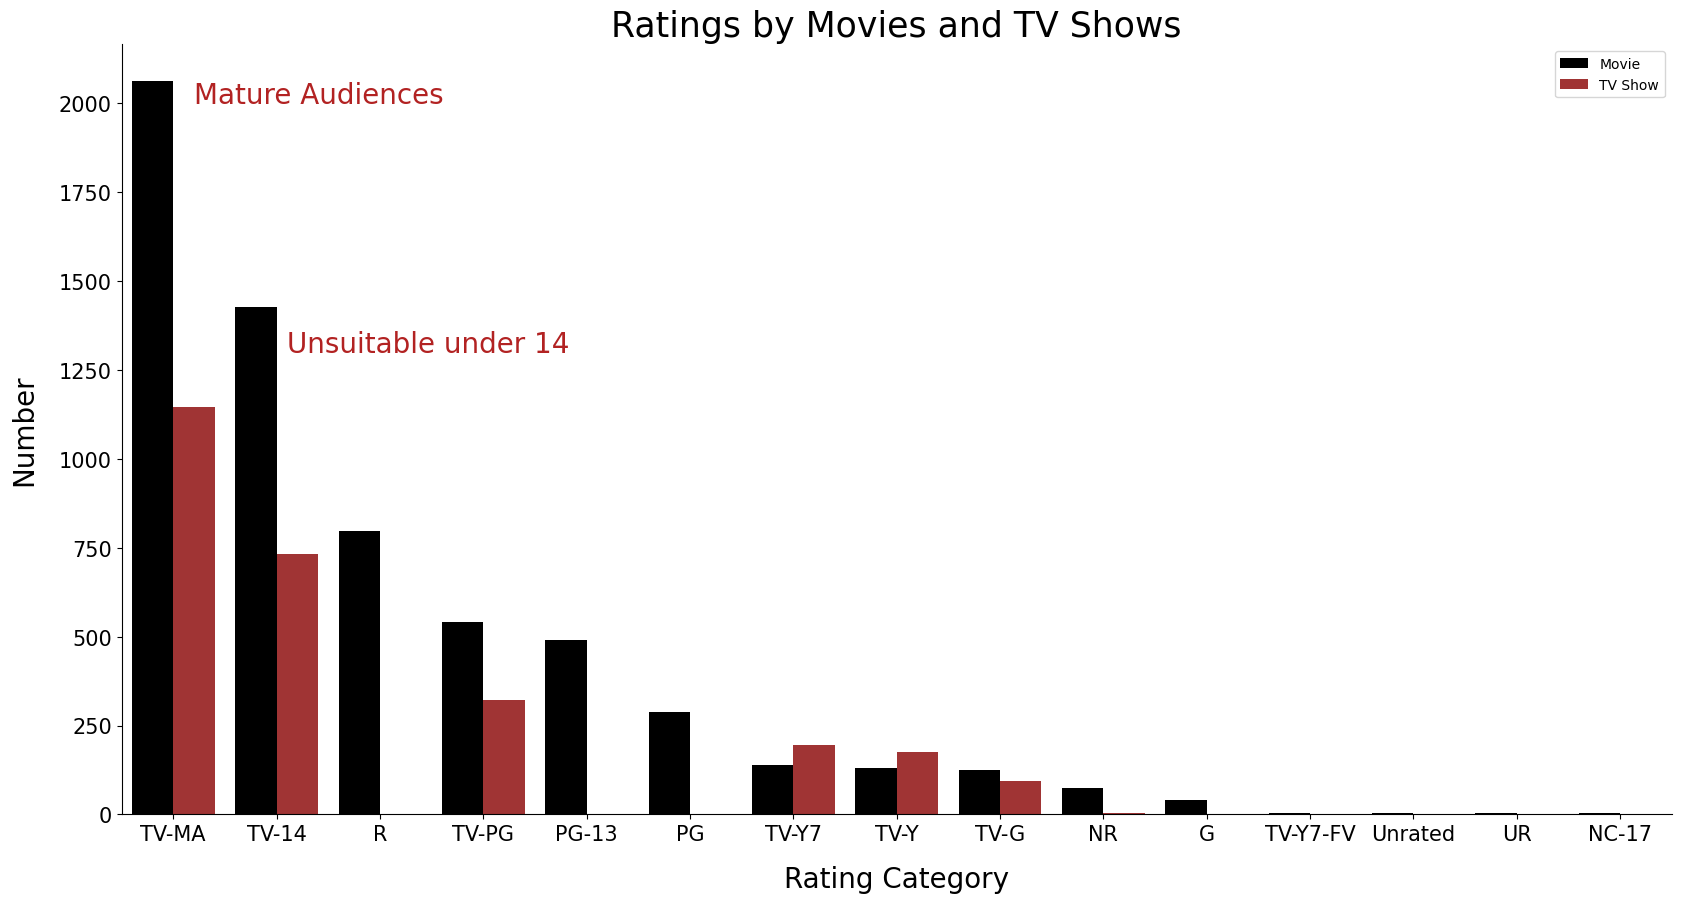

In [796]:
# Get the dataframe grouped by movies and tv and the counts for each rating
compare_ratings = pd.DataFrame(df.groupby('type',as_index = False)['rating'].value_counts())

# Set the figure
plt.figure(figsize=(20,10))
palette = ['black','firebrick']

# Plot the bars
ax =sns.barplot(compare_ratings, x = 'rating', y = 'count', hue = 'type', palette = palette)

# Add titles etc
plt.title('Ratings by Movies and TV Shows', fontsize = 25)
plt.legend(loc='upper right')
plt.xlabel('Rating Category', labelpad = 15, fontsize = 20)
plt.ylabel('Number',labelpad = 15, fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.text(0.2,2000, 'Mature Audiences', fontsize = 20, color = 'firebrick')
plt.text(1.1,1300, 'Unsuitable under 14', fontsize = 20, color = 'firebrick')
;

* TV-MA has the highest number of titles for both movies (over 2000) and tv (1145)

### 7.5 Does the number of mature content ratings vary by country?

We will compare USA and India for example. We will just compare the releases which contains only that country, rather than those that mention several countries

In [460]:
# Split out so we only take those movies and shows that are attributable to the country alone
country_names = ['United States','India']
countries_of_interest = df[df['country'].isin(country_names)]

# Check the length of the country column  to make sure we aren't including multiple
countries_of_interest['country'].apply(lambda x: len(x)).describe()

count    3790.000000
mean       10.948285
std         3.493910
min         5.000000
25%         5.000000
50%        13.000000
75%        13.000000
max        13.000000
Name: country, dtype: float64

In [477]:
# Separate off columns of interest and groupby rating and country, sorting the values
country_rating1 = countries_of_interest[['country','rating']]
country_rating_grouped1 = country_rating1.groupby(['rating','country'],as_index = False)['country'].value_counts().sort_values(by = 'count',ascending = False)

''

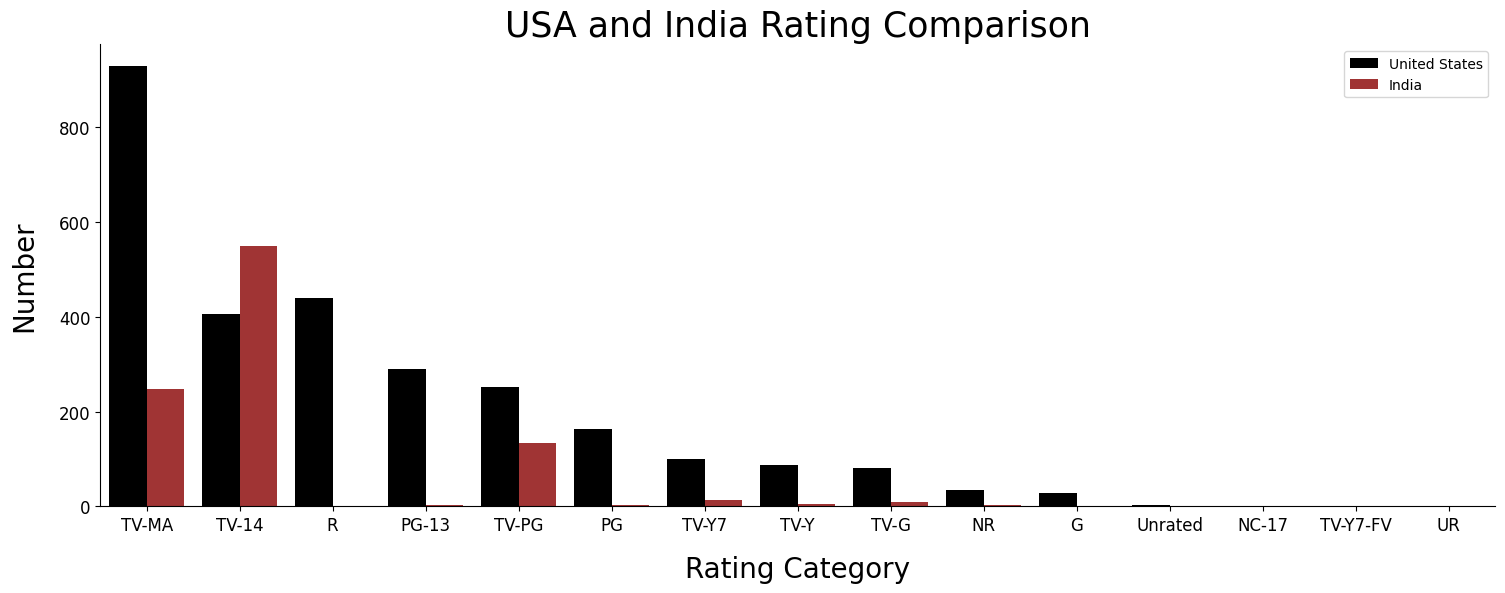

In [778]:
# Set figure
plt.figure(figsize=(18,6))
palette = ['black','firebrick']

# Plot the bars
ax = sns.barplot(country_rating_grouped1, x = 'rating', y = 'count', hue = 'country', palette = palette)

# Add titles etc
plt.title('USA and India Rating Comparison', fontsize = 25)
plt.legend(loc='upper right')
plt.xlabel('Rating Category', labelpad = 15, fontsize = 20)
plt.ylabel('Number',labelpad = 15, fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize = 12)
;

* The most common rating for Indian films is TV-14 in comparison to USA where TV-MA is more common
* WE COULD DO MORE OF THESE WITH DIFFERENT COUNTRIES COMPARISONS

### 7.6 Ratings over time - movies

In [971]:
ratings_movies = movies.copy()
ratings_movies = ratings_movies[['year','rating']]
ratings_movies.head()

,year,rating
0,2021,PG-13
6,2021,PG
7,2021,TV-MA
9,2021,PG-13
12,2021,TV-MA


In [980]:
cross_ratings = pd.crosstab(ratings_movies['rating'],ratings_movies['year']).sort_values(by = '2021',ascending = False)
cross_ratings

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
rating,,,,,,,,,,,,,,
TV-MA,1,2,0,3,0,1,9,24,114,353,456,461,382,256
TV-14,0,0,0,5,0,0,2,9,40,188,352,332,299,200
R,0,0,0,0,1,0,0,3,13,66,129,207,188,190
PG-13,0,0,0,0,0,0,0,2,6,26,53,135,122,146
PG,0,0,0,0,1,1,3,2,3,19,33,81,86,58
TV-PG,0,0,0,5,1,0,3,2,25,103,127,124,92,58
TV-Y7,0,0,0,0,0,0,0,1,16,20,15,21,21,45
TV-G,0,0,0,0,0,1,0,3,2,14,24,23,39,20
TV-Y,0,0,0,0,0,0,1,3,1,19,21,24,46,16


* For movies, the TV-MA rating has represented the greatest number of titles over the period but TV-14 has caught up
* WE CAN CHART THE TOP TWO TO SEE THE CHANGE

### 7.7 Ratings over time - tv shows

In [983]:
ratings_tv = tv.copy()
ratings_tv = ratings_tv[['year','rating']]
ratings_tv.head()

,year,rating
1,2021,TV-MA
2,2021,TV-MA
3,2021,TV-MA
4,2021,TV-MA
5,2021,TV-MA


In [984]:
cross_ratings2 = pd.crosstab(ratings_tv['rating'],ratings_tv['year']).sort_values(by = '2021',ascending = False)
cross_ratings2

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unknown
rating,,,,,,,,,,,
TV-MA,1,2,3,5,48,93,194,275,289,233,2
TV-14,0,2,0,5,58,138,99,162,140,126,3
TV-Y7,0,0,0,3,27,25,30,33,34,42,1
TV-Y,0,0,0,4,9,16,19,30,56,41,1
TV-PG,0,0,1,6,25,65,57,74,54,39,2
TV-G,0,0,1,2,7,9,12,17,22,24,0
NR,0,1,0,0,0,3,0,0,0,0,1
R,0,0,0,0,1,0,0,1,0,0,0
TV-Y7-FV,0,0,0,1,0,0,0,0,0,0,0


* With tv shows we can see that TV-14 represented more titles in 2016 and 2017 but since then it has switched to more TV-MA rated tv shows
* WE CAN CHART THIS

# 8.0 Duration

### 8.1 Movie duration

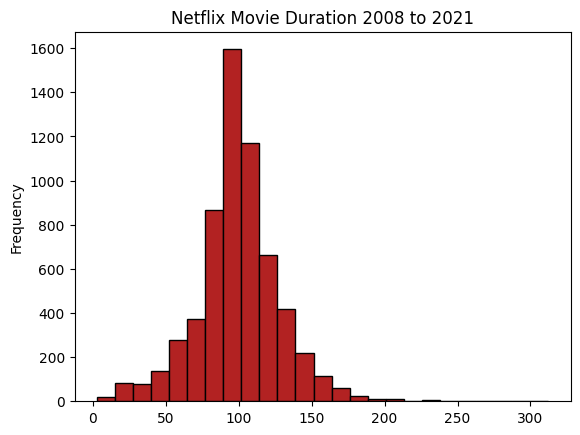

In [780]:
# Plot histogram of duration
movies['duration'].plot(kind = 'hist', ec = 'k',bins = 25, color = 'firebrick')
plt.title('Netflix Movie Duration 2008 to 2021');

In [832]:
# Get mode
print('Mode: ',movies['duration'].mode()[0])
print('Mean: ',movies['duration'].mean().round(1))
print('Median: ',movies['duration'].median())

Mode:  90
Mean:  99.6
Median:  98.0


In [834]:
# Check distribution skew
movies['duration'].skew()

0.20308983149479826

* Most movies are between 60 and 90 minutes long
* The median length of movie is 98 minutes
* The mean length of movie is 100 minutes

### 8.2 Movie duration trends over time

In [812]:
# Mean movie duration
mean_movie_duration = movies['duration'].mean()
mean_movie_duration

99.57250040776383

In [840]:
# Mean duration by year
movies.groupby('year')['duration'].agg(['mean','std'])

,mean,std
year,,
2008,81.000000,NaN
2009,66.500000,53.033009
2010,84.000000,NaN
2011,93.461538,6.132093
2012,62.000000,31.432467
2013,83.500000,29.022405
2014,77.000000,21.936778
2015,83.571429,24.433105
2016,83.664032,24.708976


* The average length of movie has been increasing over the period
* The standard deviation has remained relatively stable with the exception of 2009 where there were very few releases

''

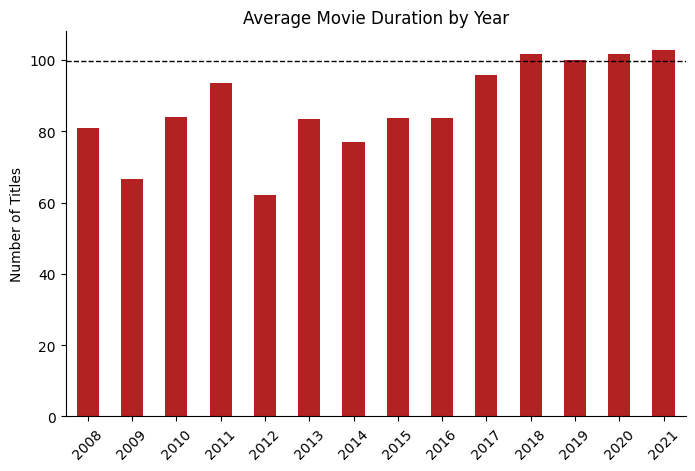

In [836]:
fig, ax = plt.subplots(figsize = (8,5))
ax= movies.groupby('year')['duration'].mean().plot(kind = 'bar',color = 'firebrick')
plt.title('Average Movie Duration by Year')
plt.xlabel(None)
plt.ylabel('Number of Titles')
ax.set_xticklabels(labels = years1, rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y=99.57, xmin=0, linewidth=1, linestyle = '--',color='black')
;

* Movie lengths have been getting longer over the period

### 8.3 TV duration

In [644]:
# Check unique values
tv['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [655]:
# Get counts of duration
tv_duration = tv.groupby('duration',as_index = False)['show_id'].count().sort_values(by = 'show_id',ascending = False)
tv_duration.head()

,duration,show_id
0,1 Season,1793
7,2 Seasons,425
8,3 Seasons,199
9,4 Seasons,95
10,5 Seasons,65


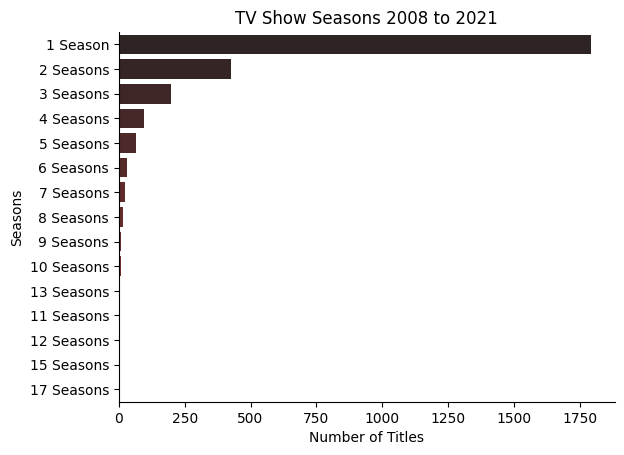

In [781]:
# Barplot
ax = sns.barplot(data = tv_duration, y = 'duration', x = 'show_id', palette = 'dark:firebrick')
plt.title('TV Show Seasons 2008 to 2021')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Number of Titles')
plt.ylabel('Seasons');

* Most titles only run for one season
* Has this always been the case?

### 8.4 Tv shows duration over time

In [985]:
tvshow_duration = tv[['year','duration']]
tvshow_duration

,year,duration
1,2021,2 Seasons
2,2021,1 Season
3,2021,1 Season
4,2021,2 Seasons
5,2021,1 Season
...,...,...
8795,2018,2 Seasons
8796,2017,2 Seasons
8797,2018,3 Seasons
8800,2016,1 Season


In [986]:
cross_duration = pd.crosstab(tvshow_duration['duration'],tvshow_duration['year']).sort_values(by = '2021',ascending = False)
cross_duration

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unknown
duration,,,,,,,,,,,
1 Season,1,2,0,14,140,253,292,414,383,294,0
2 Seasons,0,0,0,4,17,41,61,103,97,98,4
3 Seasons,0,0,2,1,8,22,26,46,43,50,1
4 Seasons,0,1,0,2,2,14,10,8,32,25,1
5 Seasons,0,1,2,1,6,7,8,9,14,16,1
6 Seasons,0,1,0,0,0,3,5,4,10,10,0
7 Seasons,0,0,0,3,1,3,4,1,5,6,0
9 Seasons,0,0,0,0,2,0,0,2,3,2,0
10 Seasons,0,0,0,1,0,0,1,0,3,1,1


* Season 1 appears to have got longer since 2016, reaching a peak in 2019 and then falling again
* WE CAN CHART THIS

# 9.0 Cast

Again, this column contains more than one item so we will need to expand it out as for the previous columns

### 9.1 Split out the cast data

In [262]:
cast_movies = movies.copy()
cast_tv = tv.copy()

In [481]:
# Split on comma and expand then melt to get dataframe of genres for movies
cast_movies = cast_movies['cast'].str.split(', ', expand=True).reset_index()
cast_movies_melt = cast_movies.melt(id_vars = 'index', var_name = 'col',value_name = 'cast')
cast_movies_top = pd.DataFrame(cast_movies_melt['cast'].value_counts().head())

# Split on comma and expand then melt to get dataframe of genres for movies
cast_tv = cast_tv['cast'].str.split(', ', expand=True).reset_index()
cast_tv_melt = cast_tv.melt(id_vars = 'index', var_name = 'col',value_name = 'cast')
cast_tv_top = pd.DataFrame(cast_tv_melt['cast'].value_counts().head(10))

In [489]:
# Drop the unknowns as there are quite a few - get 11 as we will drop a row for unknown
cast_movies_top = pd.DataFrame(cast_movies_melt['cast'].value_counts().head(11))
cast_movies_top = cast_movies_top[1:].reset_index()
cast_movies_top.columns = ['Actor','Number of Movies']
cast_movies_top

,Actor,Number of Movies
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
5,Paresh Rawal,28
6,Julie Tejwani,28
7,Amitabh Bachchan,28
8,Boman Irani,27
9,Rupa Bhimani,27


In [490]:
# Drop the unknowns as there are quite a few - get 11 as we will drop a row for unknown
cast_tv_top = pd.DataFrame(cast_tv_melt['cast'].value_counts().head(11))
cast_tv_top = cast_tv_top[1:].reset_index()
cast_tv_top.columns = ['Actor','Number of Shows']
cast_tv_top

,Actor,Number of Shows
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Junichi Suwabe,17
3,Daisuke Ono,17
4,Ai Kayano,17
5,Yuichi Nakamura,16
6,Jun Fukuyama,15
7,Yoshimasa Hosoya,15
8,David Attenborough,14
9,Mamoru Miyano,13


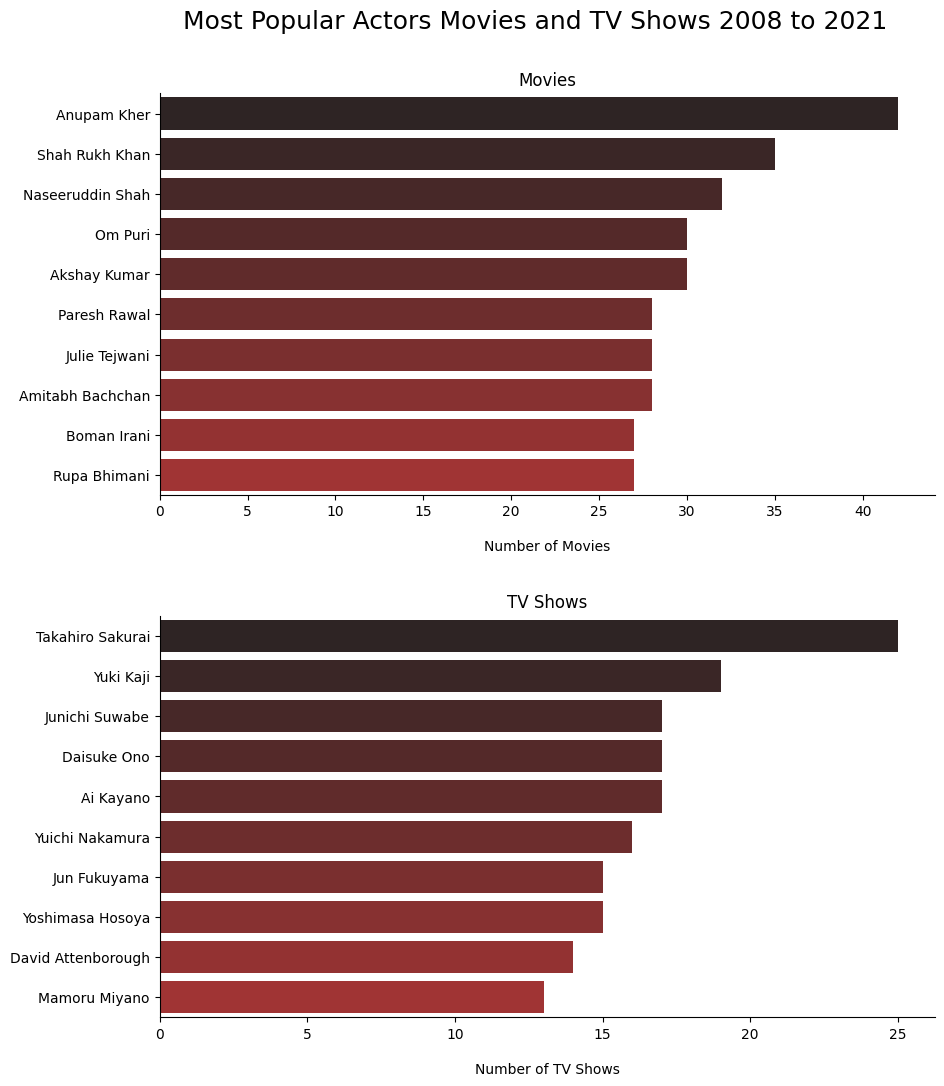

In [782]:
fig, ax = plt.subplots(2, 1, figsize = (10,12))

# Plot barcharts
sns.barplot(ax = ax[0],y = 'Actor', x = 'Number of Movies', data = cast_movies_top, palette = 'dark:firebrick')
ax[0].set_title('Movies', fontsize=12)
ax[0].set_xlabel('Number of Movies', labelpad = 15)
ax[0].set(ylabel=None)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

sns.barplot(ax = ax[1],y = 'Actor', x = 'Number of Shows', data = cast_tv_top, palette = 'dark:firebrick')
ax[1].set_title('TV Shows', fontsize=12)
ax[1].set_xlabel('Number of TV Shows', labelpad = 15)
ax[1].set(ylabel=None)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# Set overall title and layout
plt.suptitle('Most Popular Actors Movies and TV Shows 2008 to 2021', size=18, y=0.95)
plt.subplots_adjust(hspace=0.3)

* For movies, the top actors are all Indian, with the most popular actor being in over 40 titles
* For TV shows the pattern is different, the top 8 names are Japanese, reflecting the popularity of the type of content 
* USA actors do not feature in either list, despite the most content being from the USA
* There might be differences over time worth investigating

### 92 Cast over time

# FINISH THIS

# 10.0 Directors Analysis

### 10.1 Top directors

In [507]:
df['director'].value_counts()

Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

* A lot of unknowns in the directors, the others in the top frequency appear to be mainly indian
* Again we are going to have to split out the names as there are joint directors for some titles

In [542]:
# Remove the unknowns and expand out the director column, stack and reset index
directors = pd.DataFrame(df[df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack())
directors.reset_index(inplace = True)
directors.drop(columns = 'level_1',axis = 1,inplace = True)
directors.columns = ['Title','Director']
directors

,Title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Ganglands,Julien Leclercq
2,Midnight Mass,Mike Flanagan
3,My Little Pony: A New Generation,Robert Cullen
4,My Little Pony: A New Generation,José Luis Ucha
...,...,...
6973,Zinzana,Majid Al Ansari
6974,Zodiac,David Fincher
6975,Zombieland,Ruben Fleischer
6976,Zoom,Peter Hewitt


In [546]:
directors_count = directors.groupby('Director',as_index = False)['Title'].count()
top_directors = directors_count.sort_values(by = 'Title',ascending = False).head()
top_directors

,Director,Title
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
4457,Suhas Kadav,16
2866,Marcus Raboy,16


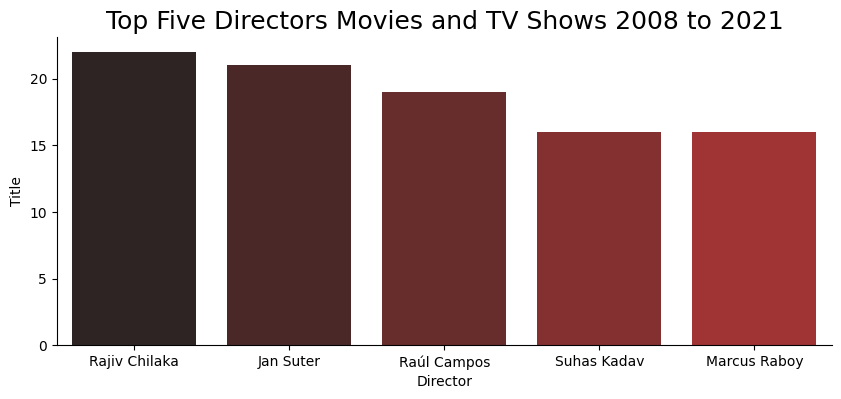

In [783]:
plt.figure(figsize=(10,4))

ax = sns.barplot(data = top_directors, x = 'Director', y = 'Title', palette = 'dark:firebrick')
plt.title('Top Five Directors Movies and TV Shows 2008 to 2021', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### 10.2 Top directors over time

# FINISH THIS

# 11.0 Film Description Analysis

Be interesting to do a wordcloud of the types of words being used in the descriptions for movies compared to tv shows and between countries

## 11.1 Basic word clouds for movies and tv

In [556]:
# Import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [557]:
# Create function to run wordclouds

def wordcloud(df,title):
    
    # Create text object
    text = " ".join(review for review in df.description)
    
    # Set stopwords
    stopwords = set(STOPWORDS)
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    
    # Plot the wordcloud
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
    

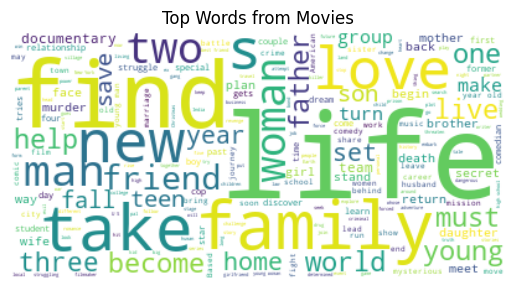

In [558]:
wordcloud(movies,'Top Words from Movies')

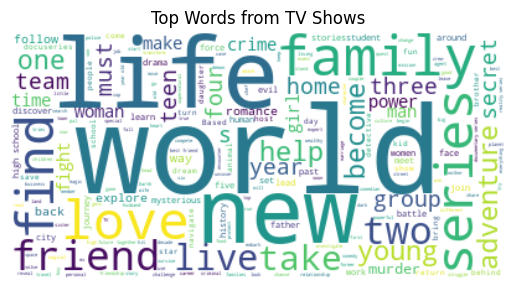

In [559]:
wordcloud(tv, 'Top Words from TV Shows')

## 11.2 Does this vary by country?

### Words seem to vary by country and by the type (movie or tv shows) FINISH

### 11.3 Does this vary over time?

### Words might vary over time